In [1]:
%matplotlib inline 
import pandas as pd
from utils import plot_model_results, split_data

In [2]:
df = pd.read_csv('data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### Drop Columns with Large Amounts of Null

In [3]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [4]:
# Date is irrelevant
# Sunshine and Evaporation have over 60k nans
# RISK_MM is too correlated
# Cloud 9am, Cloud 3pm 50k nans
# WindDir, we are measuring form different locations
df = df.drop(columns=['Date', 'Sunshine', 'Evaporation', 'RISK_MM', 'Cloud9am', 'Cloud3pm', 'WindDir9am', 'WindDir3pm', 'WindGustDir', 'Location'])
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [5]:
df.isna().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [6]:
df = df.dropna()
df.shape

(119590, 14)

In [7]:
# Encode Binary Labels for True/False Values
df['RainToday'] = df['RainToday'].apply(lambda x: 0 if x == 'No' else 1)
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


### Identify Outliers
By plotting histograms of our features we are able to visualize the distribution and identify outliers.

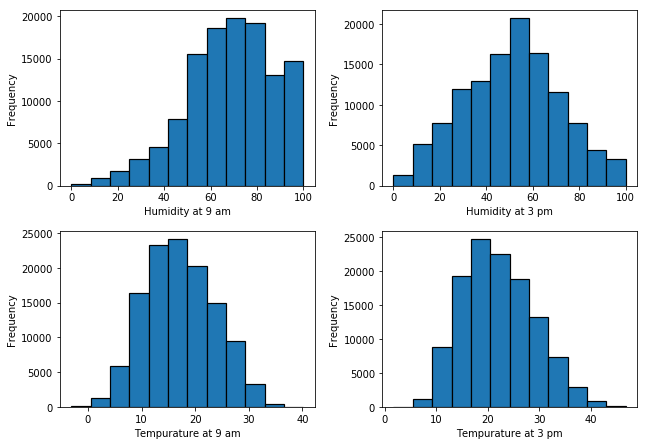

In [8]:
import matplotlib.pyplot as plt
n_bins = 12
grid = plt.GridSpec(4, 4)#, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])

ax1.hist(df['Humidity9am'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Humidity at 9 am')
ax1.set_ylabel('Frequency')

ax2.hist(df['Humidity3pm'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax2.set_xlabel('Humidity at 3 pm')
ax2.set_ylabel('Frequency')

ax3.hist(df['Temp9am'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax3.set_xlabel('Tempurature at 9 am')
ax3.set_ylabel('Frequency')

ax4.hist(df['Temp3pm'].values,  bins=n_bins, edgecolor='black', linewidth=1.2)
ax4.set_xlabel('Tempurature at 3 pm')
ax4.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

We can see there are some clear outliers in humidity and tempurature at 9 am and 3 pm. Below we trim off some outliers for some of our features.

In [9]:
print(f"Dropping {len(df[df['Temp9am'] <= 5])} rows where (Temperature at 9 am) is less than 6 degrees")
df = df[df['Temp9am'] > 5]
print(f"Dropping {len(df[df['Temp3pm'] > 42])} rows where (Temperature at 3 pm) is greater than 42 degrees")
df = df[df['Temp3pm'] <= 42]
print(f"Dropping {len(df[df['Humidity9am'] <= 9])} rows where (Humidity at 9 am) is less than 10")
df = df[df['Humidity9am'] > 10]
print(df.shape)

Dropping 2265 rows where (Temperature at 9 am) is less than 6 degrees
Dropping 150 rows where (Temperature at 3 pm) is greater than 42 degrees
Dropping 251 rows where (Humidity at 9 am) is less than 10
(116855, 14)


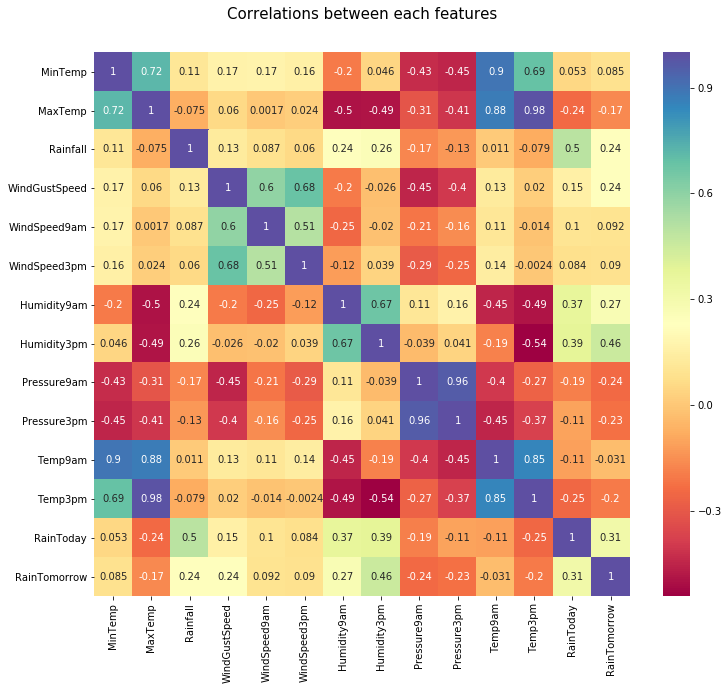

In [10]:
# update: the correlations to RainToday and RainTomorrow are also included.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
colormap = plt.cm.Spectral
plt.title('Correlations between each features', y=1.05, size=15)
corrs = df.corr()
sns.heatmap(corrs, cmap = colormap, linecolor = 'white', annot = True)

Text(0, 0.5, 'Correlation to Rainfall')

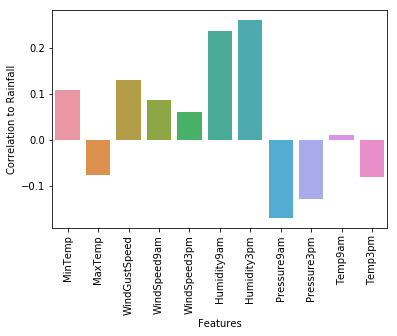

In [11]:
# I also included the graph of correlations to RainToday below. That might make more sense to analyze instead of the correlations to amount of rainfall
rainfall_corrs = corrs[['Rainfall']].drop(['RainToday','RainTomorrow','Rainfall'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'Rainfall', data = rainfall_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to Rainfall')

Text(0, 0.5, 'Correlation to RainTomorrow')

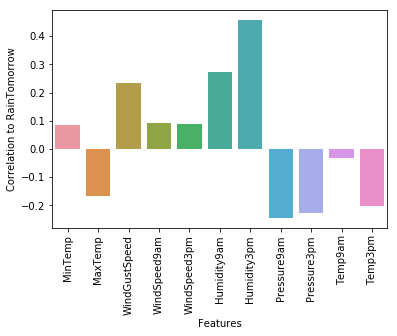

In [12]:
raintomorrow_corrs = corrs[['RainTomorrow']].drop(['RainToday','RainTomorrow','Rainfall'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'RainTomorrow', data = raintomorrow_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to RainTomorrow')

Text(0, 0.5, 'Correlation to RainToday')

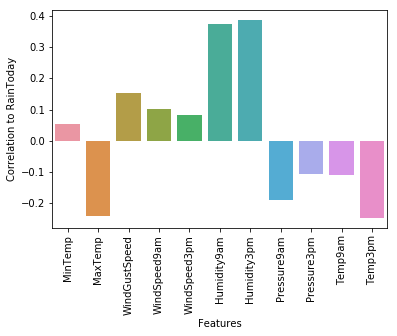

In [13]:
raintoday_corrs = corrs[['RainToday']].drop(['RainToday','RainTomorrow','Rainfall'], axis = 0).reset_index()
sns.barplot(x = 'index', y = 'RainToday', data = raintoday_corrs)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation to RainToday')

## Normalize the Data
Below we normalize the data. We do this by subtracting the mean of each column from each entry of that column then dividing by the standard deviation of the feature. This results in normalization per feature.

## Splitting Into Targets and Labels
Below the train, test, and validation data sets are split into labels and targets then converted to numpy arrays.

In [14]:
rain_tomorrow = df['RainTomorrow']
df = (df - df.mean()) / df.std()
df['RainTomorrow'] = rain_tomorrow

X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, val_pct=.2, test_pct=.1)
df.head()

Training data length:   81798
Validation data length: 23371
Test data length:       11685


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.128913,-0.106483,-0.206059,0.275396,0.629094,0.555250,0.158151,-1.400501,-1.401285,-1.158545,-0.081504,-0.045970,-0.537262,0
1,-0.846313,0.215952,-0.276203,0.275396,-1.199439,0.324134,-1.286403,-1.255039,-0.987789,-1.057633,-0.032851,0.328283,-0.537262,0
2,0.047644,0.303889,-0.276203,0.424875,0.514810,0.786367,-1.607415,-1.012603,-1.415544,-0.927888,0.583419,0.163612,-0.537262,0
3,-0.553745,0.640980,-0.276203,-1.219390,-0.399456,-1.178124,-1.232901,-1.691425,0.010307,-0.336831,0.113108,0.657626,-0.537262,0
4,0.795317,1.271194,-0.159297,0.051178,-0.856589,0.093017,0.746673,-0.867141,-0.959271,-1.317121,0.064455,1.136671,-0.537262,0


## Tensorflow Feed Forward Neural Network
Below we define a feed forward neural network. The network takes as input the features of a single day. The output is a sigmoid layer meaning our output layer is essentially a logistic regression layer. We use binary cross entropy loss and accuracy to evaluate model performace. The model is evaluated on validation data on every epoch.

In [15]:
import tensorflow as tf
from tensorflow import keras

INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = 1
EPOCHS = 5
BATCH_SIZE = 128

model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


## Baseline Model
Here we fit the network onto the training data set for 10 epochs. We use our validation data to prevent overfitting. We use all of the features of our dataset to establish a baseline of performance. We will compare our reduced feature performace to this model.

In [16]:
from keras.callbacks import History 

history = History()
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[history])

Using TensorFlow backend.


Train on 81798 samples, validate on 23371 samples
Epoch 1/5
81798/81798 [==============================] - 2s 24us/step - loss: 0.3791 - acc: 0.8357 - binary_crossentropy: 0.3791 - val_loss: 0.3353 - val_acc: 0.8569 - val_binary_crossentropy: 0.3353
Epoch 2/5
81798/81798 [==============================] - 1s 14us/step - loss: 0.3619 - acc: 0.8452 - binary_crossentropy: 0.3619 - val_loss: 0.3247 - val_acc: 0.8637 - val_binary_crossentropy: 0.3247
Epoch 3/5
81798/81798 [==============================] - 1s 14us/step - loss: 0.3591 - acc: 0.8464 - binary_crossentropy: 0.3591 - val_loss: 0.3282 - val_acc: 0.8613 - val_binary_crossentropy: 0.3282
Epoch 4/5
81798/81798 [==============================] - 1s 14us/step - loss: 0.3573 - acc: 0.8468 - binary_crossentropy: 0.3573 - val_loss: 0.3236 - val_acc: 0.8621 - val_binary_crossentropy: 0.3236
Epoch 5/5
81798/81798 [==============================] - 1s 14us/step - loss: 0.3561 - acc: 0.8475 - binary_crossentropy: 0.3561 - val_loss: 0.3233 - 

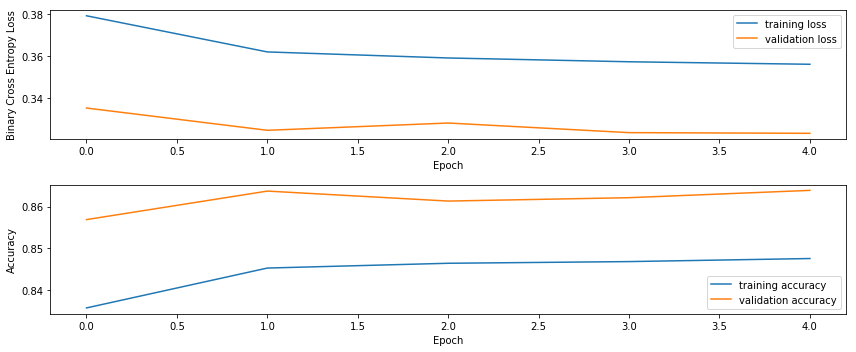

In [17]:
plot_model_results(history)

In [18]:
test_loss, test_acc, t = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}\nTest Accuracy: {test_acc}")

11685/11685 [==============================] - 0s 18us/step
Test Loss: 0.2936502418549756
Test Accuracy: 0.8720581942661532


## A Much Simpler Model
Here we train a neural network with the same architecture as the baseline on a reduced dataset. We drop all columns other than humidity at 9 am and 3 pm. We then train the network in the same fashion as before, utilizing a validation dataset to prevent overfitting

In [19]:
df = df[['Humidity9am', 'Humidity3pm', 'RainTomorrow']]
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, val_pct=.2, test_pct=.1)
df.head()

Training data length:   81798
Validation data length: 23371
Test data length:       11685


,Humidity9am,Humidity3pm,RainTomorrow
0,0.158151,-1.400501,0
1,-1.286403,-1.255039,0
2,-1.607415,-1.012603,0
3,-1.232901,-1.691425,0
4,0.746673,-0.867141,0


In [20]:
import tensorflow as tf
from tensorflow import keras
print(X_train.shape)
INPUT_DIM = X_train.shape[1]
OUTPUT_DIM = 1
EPOCHS = 5
BATCH_SIZE = 128
tf.keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Dense(32, input_dim=INPUT_DIM, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(32, activation=tf.nn.tanh),
    keras.layers.Dense(OUTPUT_DIM, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_crossentropy'])
model.summary()

(81798, 2)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


In [21]:
from keras.callbacks import History 

history = History()
model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), callbacks=[history])

Train on 81798 samples, validate on 23371 samples
Epoch 1/5
81798/81798 [==============================] - 1s 17us/step - loss: 0.4251 - acc: 0.8216 - binary_crossentropy: 0.4251 - val_loss: 0.3981 - val_acc: 0.8308 - val_binary_crossentropy: 0.3981
Epoch 2/5
81798/81798 [==============================] - 1s 14us/step - loss: 0.4174 - acc: 0.8248 - binary_crossentropy: 0.4174 - val_loss: 0.4005 - val_acc: 0.8302 - val_binary_crossentropy: 0.4005
Epoch 3/5
81798/81798 [==============================] - 1s 14us/step - loss: 0.4163 - acc: 0.8264 - binary_crossentropy: 0.4163 - val_loss: 0.3989 - val_acc: 0.8301 - val_binary_crossentropy: 0.3989
Epoch 4/5
81798/81798 [==============================] - 1s 14us/step - loss: 0.4163 - acc: 0.8262 - binary_crossentropy: 0.4163 - val_loss: 0.3997 - val_acc: 0.8277 - val_binary_crossentropy: 0.3997
Epoch 5/5
81798/81798 [==============================] - 1s 14us/step - loss: 0.4157 - acc: 0.8269 - binary_crossentropy: 0.4157 - val_loss: 0.3983 - 

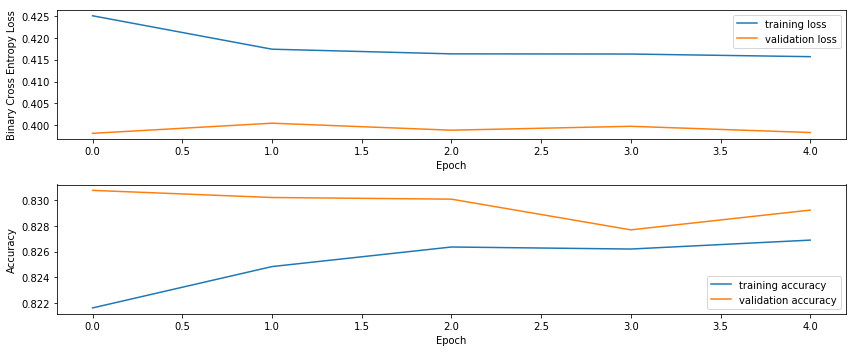

In [22]:
plot_model_results(history)

In [23]:
test_loss, test_acc, t = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}\nTest Accuracy: {test_acc}")

11685/11685 [==============================] - 0s 18us/step
Test Loss: 0.3501319743998932
Test Accuracy: 0.8556268720581943


## Analysis
We were very impressed with how well the model performed using only the humidity data points. The results supported our hypothesis that humidity had the greatest relationship with it raining tomorrow. The accuracy our baseline model achieved was 87.2%. The model using the reduced dataset was able to achieve 85.6% accuracy.
